# ***Brain Tumor Prediction Using Naive Bayes***

## Importing Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Loading the dataset


In [44]:
df = pd.read_csv(r"C:\Users\User\Downloads\Brain-tumor-detection.csv")
df.head()

,Unnamed: 0,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1


## Exploratory Data Analysis

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           241 non-null    int64  
 1   Area                 241 non-null    float64
 2   Perimeter            241 non-null    float64
 3   Convex Area          241 non-null    float64
 4   Solidity             241 non-null    float64
 5   Equivalent Diameter  241 non-null    float64
 6   Major Axis           241 non-null    float64
 7   Minor Axis           241 non-null    float64
 8   Eccentricity         241 non-null    object 
 9   Class                241 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 19.0+ KB


In [46]:
#missing values detection
df.isna().sum()

Unnamed: 0             0
Area                   0
Perimeter              0
Convex Area            0
Solidity               0
Equivalent Diameter    0
Major Axis             0
Minor Axis             0
Eccentricity           0
Class                  0
dtype: int64

In [47]:
#duplicate values detection 
df.duplicated().sum()


0

In [48]:
df.drop_duplicates(inplace=True)

In [49]:
#Typecasting 

df['Eccentricity'] = df['Eccentricity'].astype('complex')
df.Class = df.Class.astype('object')
print(df.dtypes)

Unnamed: 0                  int64
Area                      float64
Perimeter                 float64
Convex Area               float64
Solidity                  float64
Equivalent Diameter       float64
Major Axis                float64
Minor Axis                float64
Eccentricity           complex128
Class                      object
dtype: object


In [50]:
#structural errors
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [51]:
df['eccentricity'] = df['eccentricity'].apply(lambda x: abs(x))

In [52]:
df['eccentricity'] = df['eccentricity'].astype('float')

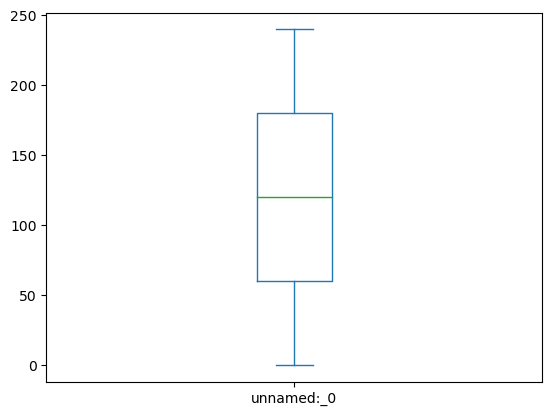

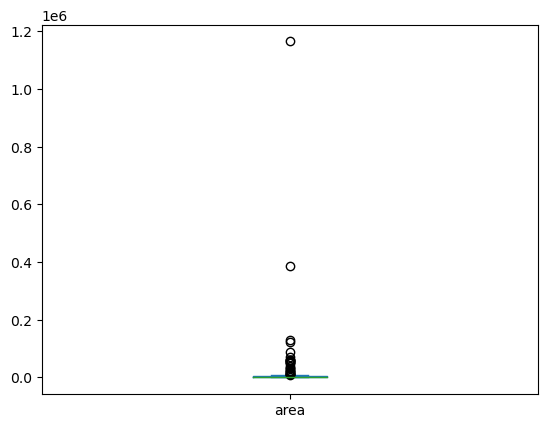

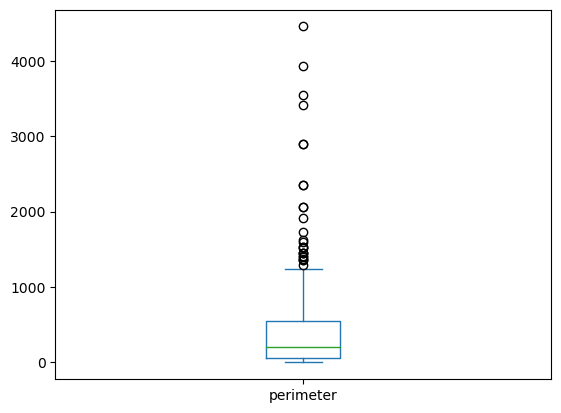

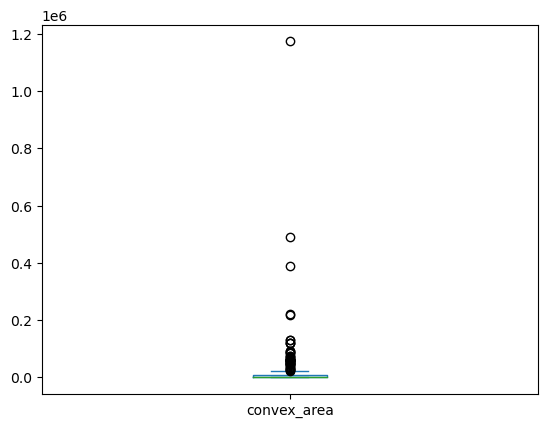

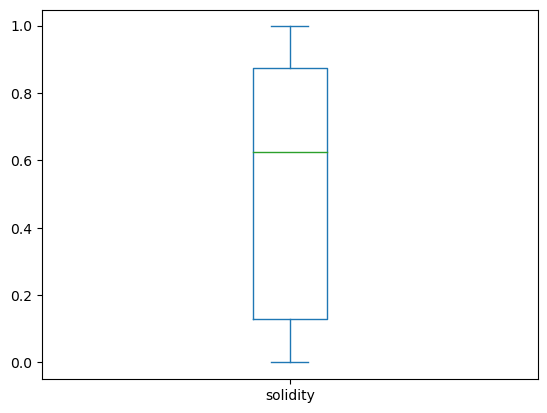

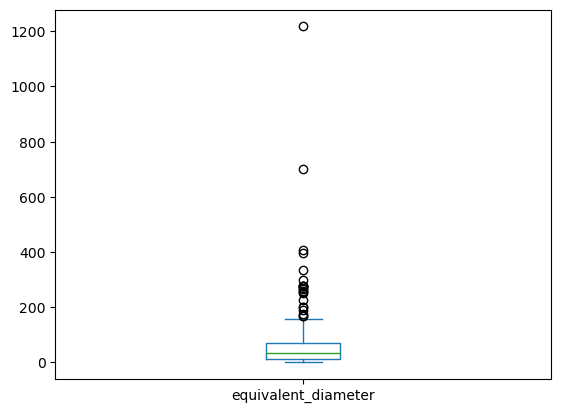

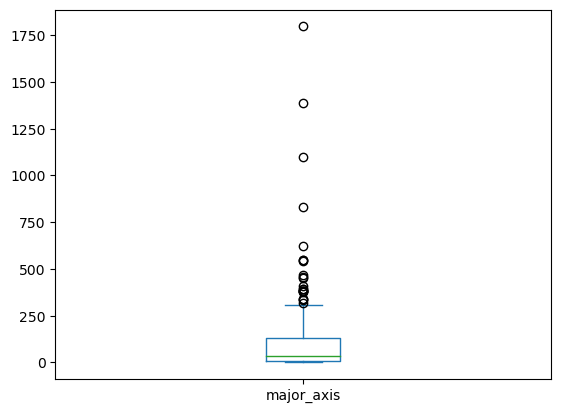

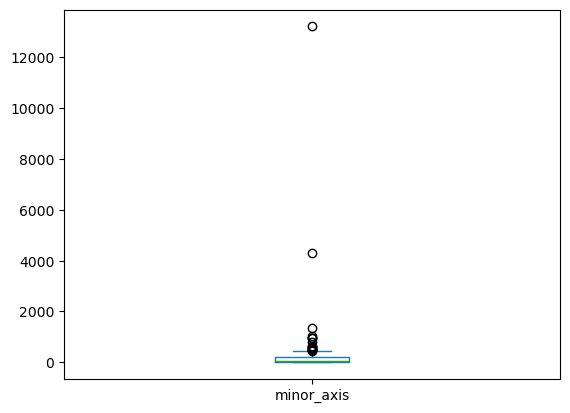

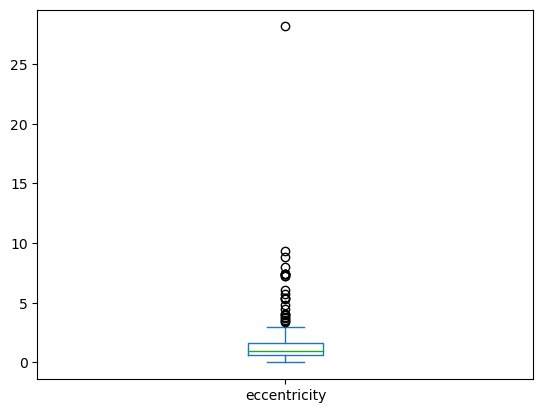

In [53]:
#outliers
for i in df.select_dtypes(exclude=['object']).columns:
    df[i].plot.box()
    plt.show()

Area:

    Small tumor: 50 square millimeters
    Large tumor: 5000 square millimeters
    
Perimeter:

    Irregularly shaped tumor: 30 millimeters
    Circular tumor: 100 millimeters
Convex Area:

    Small, irregular tumor: 40 square millimeters
    Large, more convex tumor: 3000 square millimeters
Solidity:

    Compact, solid tumor: 0.9
    More irregular, less solid tumor: 0.6
Equivalent Diameter:

    Small tumor: 10 millimeters
    Large tumor: 80 millimeters
Major Axis and Minor Axis:

    Elongated tumor: Major Axis - 40 millimeters, Minor Axis - 20 millimeters
    Circular tumor: Major Axis - 30 millimeters, Minor Axis - 30 millimeters

unnamed:_0


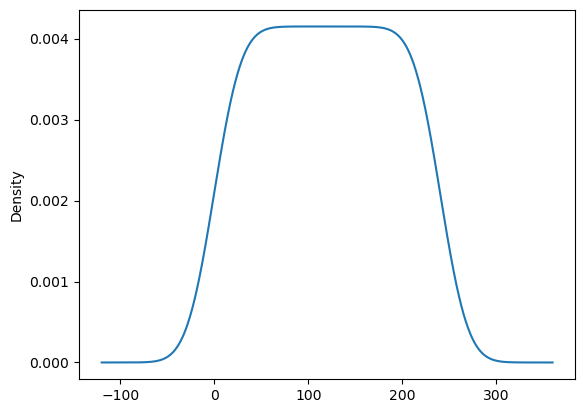

area


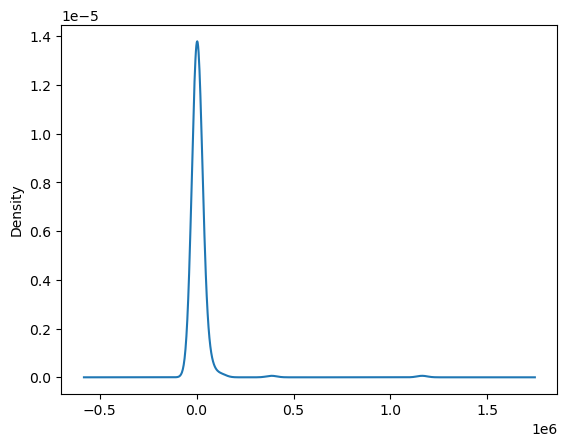

perimeter


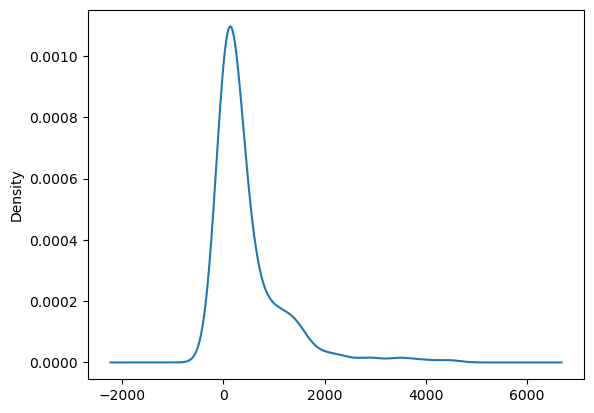

convex_area


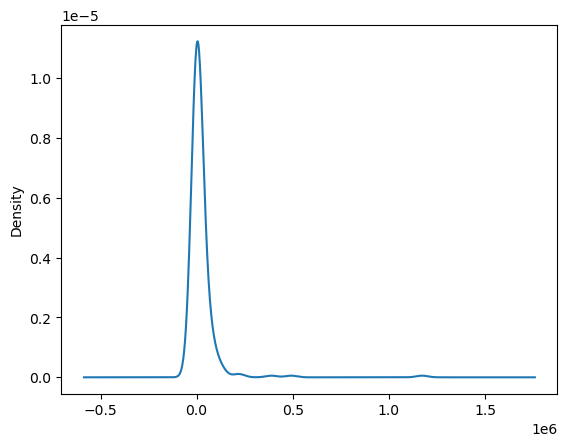

solidity


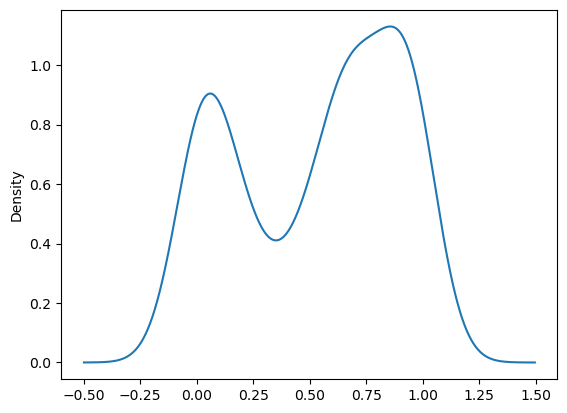

equivalent_diameter


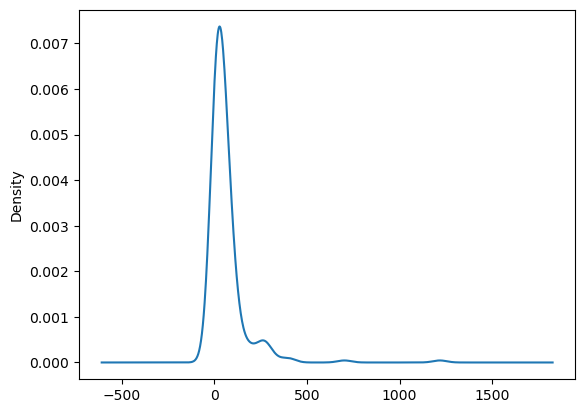

major_axis


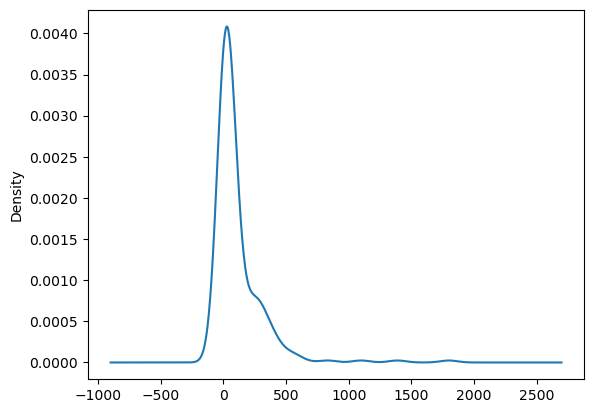

minor_axis


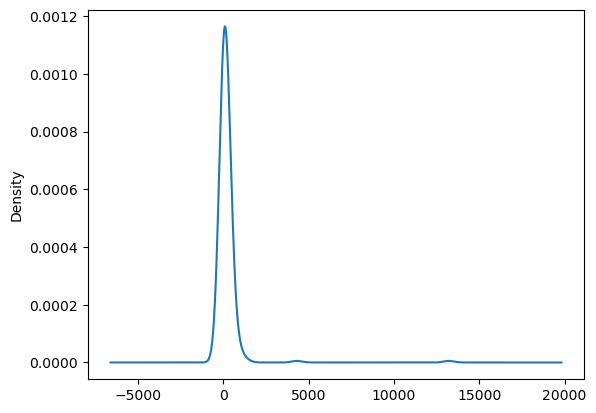

eccentricity


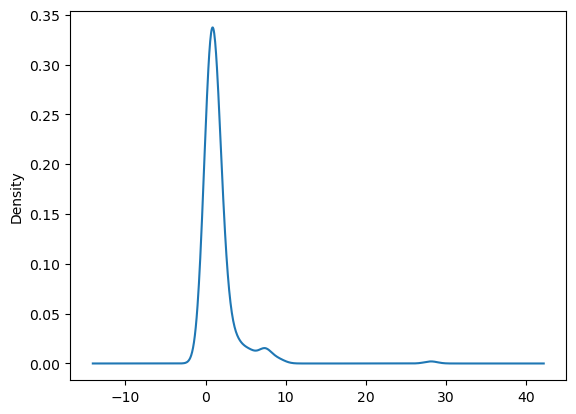

In [54]:
#outliers
for i in df.select_dtypes(exclude=['object']).columns:
    print(i)
    df[i].plot.kde()
    plt.show()

In [55]:
df['class'] = df['class'].map({1 :"Tumor detected", 0: "No tumor detected"})

## Data Preprocessing

### Feature Selection

In [56]:
df = df.drop(['major_axis','minor_axis'],axis=1) #these columns columns are not useful to analysis because combination these two columns is eccentricity

In [57]:
df

,unnamed:_0,area,perimeter,convex_area,solidity,equivalent_diameter,eccentricity,class
0,0,6314.5,521.972649,9855.5,0.640708,89.665328,1.378312,Tumor detected
1,1,52776.5,1189.820409,59947.0,0.880386,259.224086,1.658266,Tumor detected
2,2,50232.5,1415.349410,69628.5,0.721436,252.899200,1.335325,Tumor detected
3,3,4486.0,275.622365,4741.5,0.946114,75.576138,1.030671,Tumor detected
4,4,145.0,92.083260,323.5,0.448223,13.587484,1.388168,Tumor detected
...,...,...,...,...,...,...,...,...
236,236,545.5,208.267025,1317.5,0.414042,26.354358,2.013375,No tumor detected
237,237,902.0,232.166520,1444.5,0.624438,33.888967,1.800646,No tumor detected
238,238,3177.0,217.681239,3260.0,0.974540,63.600959,0.296509,No tumor detected
239,239,6103.0,1208.631593,51259.5,0.119061,88.150899,0.206967,No tumor detected


<Axes: >

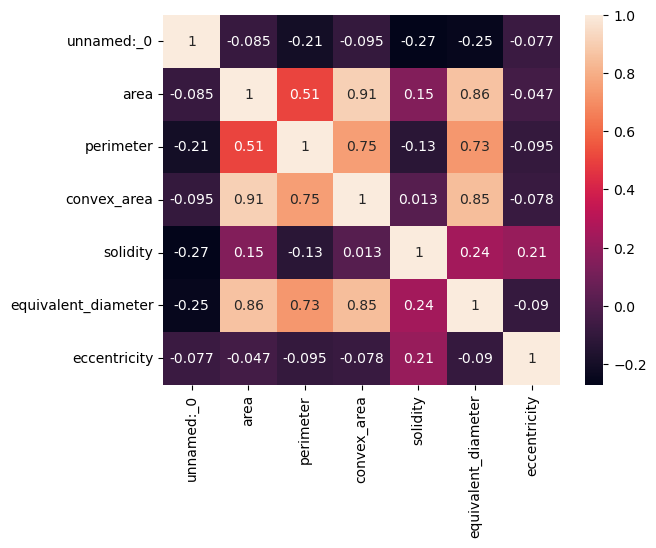

In [58]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [59]:
df.drop('unnamed:_0' , axis=1 , inplace=True)

### Splitting the data into input and output features

In [60]:
X = df.drop('class',axis=1)
y = df['class']

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler ,MinMaxScaler, PowerTransformer,StandardScaler,MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [63]:
num_col = X_train.select_dtypes(exclude='object').columns

In [64]:
num_trans = Pipeline(steps=[('Scaler',RobustScaler()),
               ("transformation",PowerTransformer())])

In [65]:
preprocess = ColumnTransformer([('Step 1',num_trans,num_col)
                  ])



In [66]:
pipe = Pipeline([('Preprocess',preprocess),
         ('Model',GaussianNB())])

In [67]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(transformers=[('Step 1',
                                                  Pipeline(steps=[('Scaler',
                                                                   RobustScaler()),
                                                                  ('transformation',
                                                                   PowerTransformer())]),
                                                  Index(['area', 'perimeter', 'convex_area', 'solidity', 'equivalent_diameter',
       'eccentricity'],
      dtype='object'))])),
                ('Model', GaussianNB())])

In [68]:
y_pred = pipe.predict(X_test)

In [69]:
n = np.array([7465.0,1921.214415,130247.0,0.057314,97.492221,0.594490])
numeric_features = ['area', 'perimeter', 'convex_area', 'solidity', 'equivalent_diameter', 'eccentricity']
n_df = pd.DataFrame([n], columns=numeric_features)

pipe.predict(n_df)

array(['Tumor detected'], dtype='<U17')

In [77]:
import pickle
with open('baig.pkl', 'wb') as model_file:
    pickle.dump(pipe, model_file)

In [71]:
X_test

,area,perimeter,convex_area,solidity,equivalent_diameter,eccentricity
24,9700.0,446.475176,10448.5,0.928363,111.132460,1.042869
6,32059.0,1447.567664,57016.0,0.562281,202.036597,1.337732
222,2062.5,1125.050858,37117.0,0.055568,51.245064,1.411383
208,0.0,0.000000,0.0,0.000000,0.000000,0.000000
236,545.5,208.267025,1317.5,0.414042,26.354358,2.013375
...,...,...,...,...,...,...
161,568.0,111.254833,710.0,0.800000,26.892379,0.270732
176,0.0,0.000000,0.0,0.000000,0.000000,0.000000
150,0.0,0.000000,0.0,0.000000,0.000000,0.000000
228,565.5,190.953318,1225.5,0.461444,26.833132,0.632852


In [72]:
X_train


,area,perimeter,convex_area,solidity,equivalent_diameter,eccentricity
97,97.0,89.798990,137.5,0.705455,11.113246,7.399764
140,1933.0,171.681239,1972.5,0.979975,49.610201,0.847685
190,0.0,0.000000,0.0,0.000000,0.000000,0.000000
68,1306.0,208.024384,1944.5,0.671638,40.778068,0.762695
119,2082.5,401.203098,5489.5,0.379361,51.492925,0.495824
...,...,...,...,...,...,...
106,800.0,402.676188,3937.0,0.203200,31.915382,1.405304
14,1160.5,203.580734,1674.0,0.693250,38.439491,2.387821
92,4767.5,496.315796,6550.0,0.727863,77.911293,1.186071
179,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [74]:
accuracy_score(y_test,y_pred)

0.6721311475409836

In [75]:
confusion_matrix(y_test,y_pred)

array([[17,  9],
       [11, 24]], dtype=int64)

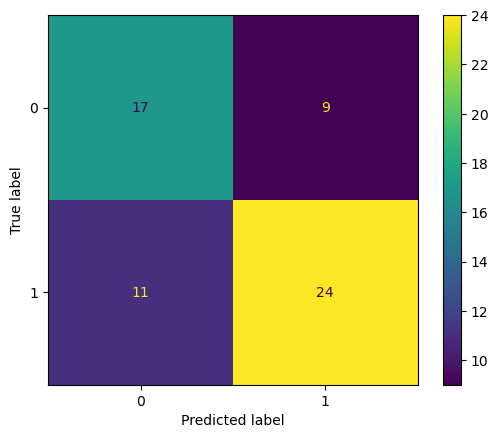

In [76]:
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = Pipeline([('Preprocess',preprocess),
         ('Model',KNeighborsClassifier())])    

In [38]:
knn.fit(X_train,y_train)

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(transformers=[('Step 1',
                                                  Pipeline(steps=[('Scaler',
                                                                   RobustScaler()),
                                                                  ('transformation',
                                                                   PowerTransformer())]),
                                                  Index(['unnamed:_0', 'area', 'perimeter', 'convex_area', 'solidity',
       'equivalent_diameter', 'eccentricity'],
      dtype='object'))])),
                ('Model', KNeighborsClassifier())])

In [39]:
y_pred = knn.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred)

0.8852459016393442

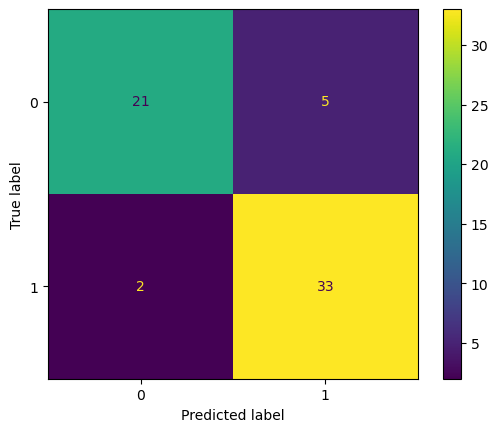

In [41]:
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()